# Installing and loading packages

In [291]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
#install_all_packages()
load_library_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

# Unsupervised Learning

Those model needs the one hot encoded version of our data

In [292]:
df_copy <- df
df_copy[, "strange_dp"] <- strange_dp
df_copy[, "strange_p"] <- strange_p
has_tag_depression <- df$TAG == "1" | df$depression  == "1" 
df_copy[, "has_tag_depression"] <- has_tag_depression
dummy <- dummyVars(" ~ .", data=before_dataset)
before_encoded_dataset <- data.frame(predict(dummy, newdata = before_dataset)) 

## PCA

In [293]:
before_encoded_dataset.pca <- prcomp(before_encoded_dataset , center = TRUE,scale. = TRUE)
summary(before_encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.90072 2.28745 2.27099 2.13297 1.95698 1.90873 1.89503
Proportion of Variance 0.05884 0.03659 0.03607 0.03182 0.02678 0.02548 0.02511
Cumulative Proportion  0.05884 0.09543 0.13150 0.16331 0.19009 0.21557 0.24068
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.81437 1.77883 1.74038 1.70459 1.6612 1.64502 1.60818
Proportion of Variance 0.02302 0.02213 0.02118 0.02032 0.0193 0.01892 0.01809
Cumulative Proportion  0.26370 0.28583 0.30701 0.32733 0.3466 0.36555 0.38364
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.58608 1.57239 1.57084 1.54867 1.54488 1.52518 1.49256
Proportion of Variance 0.01759 0.01729 0.01726 0.01677 0.01669 0.01627 0.01558
Cumulative Proportion  0.40123 0.41852 0.43578 0.45255 0.46924 0.48551 0.50108
                          PC22

Seems that PC1 and PC2 do not explain much about out that variance. TSNE could be a better solution

### Colouring exercise practice before the pandemic

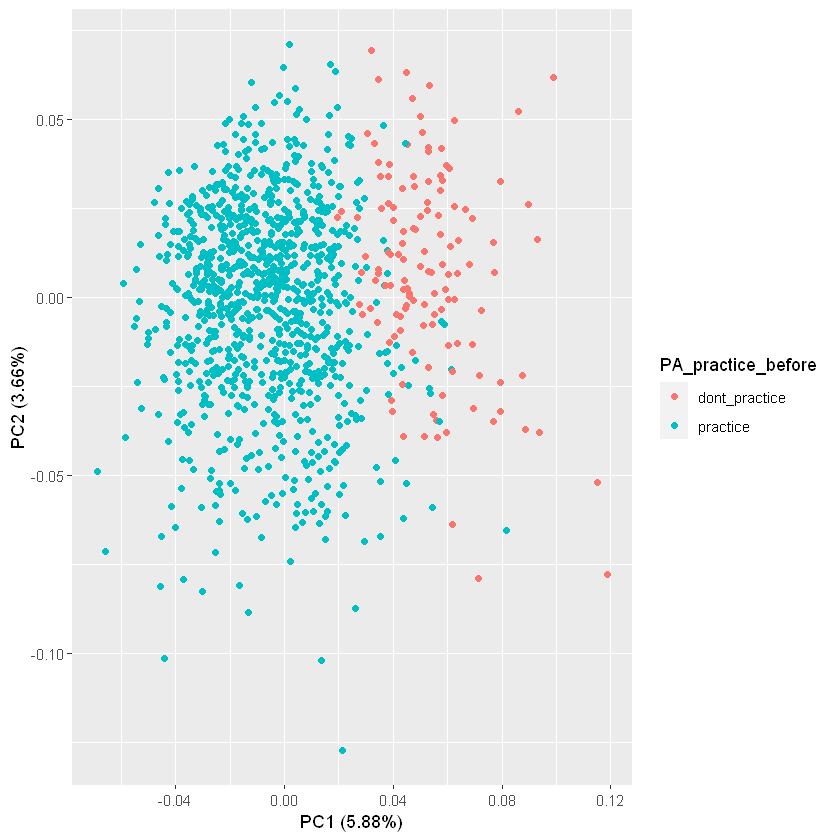

In [294]:
autoplot(before_encoded_dataset.pca, colour="PA_practice_before", data=before_dataset)

## TSNE

In [295]:
set.seed(2)
tsne <- Rtsne(before_encoded_dataset, dims = 2, perplexity=100, check_duplicates = FALSE, verbose=TRUE)

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.99 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 0.50 seconds)
Iteration 100: error is 57.596822 (50 iterations in 0.50 seconds)
Iteration 150: error is 57.596822 (50 iterations in 0.62 seconds)
Iteration 200: error is 57.596822 (50 iterations in 0.80 seconds)
Iteration 250: error is 57.596830 (50 iterations in 0.96 seconds)
Iteration 300: error is 2.314829 (50 iterations in 0.79 seconds)
Iteration 350: error is 1.307825 (50 iterations in 0.35 seconds)
Iteration 400: error is 1.264104 (50 iterations in 0.26 seconds)
Iteration 450: error is 1.259163 (50 iterations in 0.24 seconds)
Iteration 500: error is 1.254181 (50 iterations in 0.28 seconds)
Iteration 550: error is 1.251289 (50 iterations in 0.26 seconds)
Iteration 6

### Colouring exercise practice before the pandemic

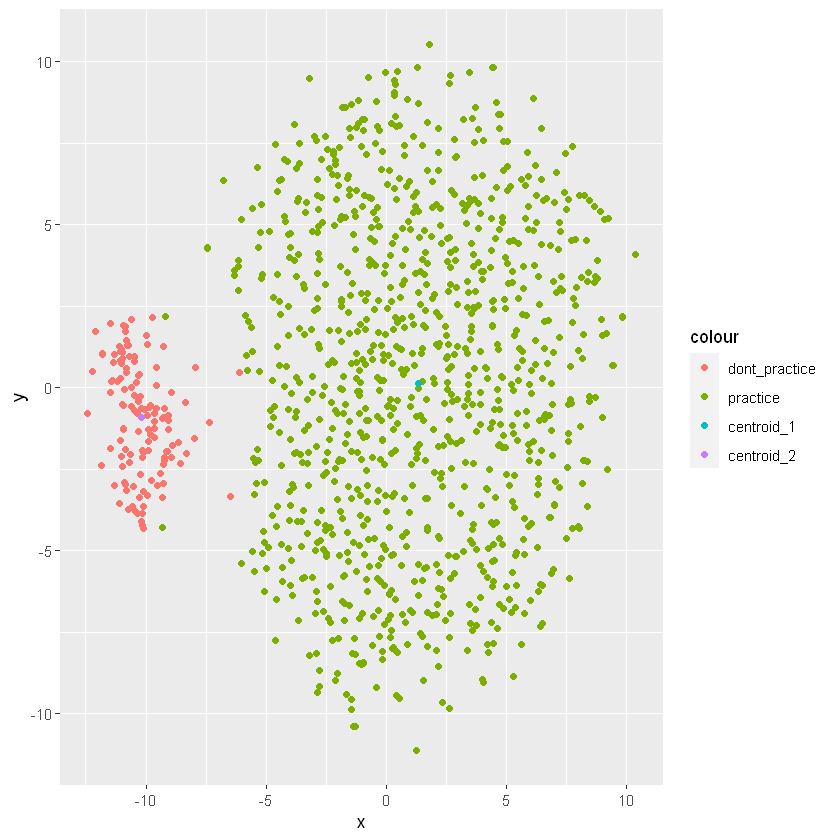

In [296]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_before )


main_tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

tsne_df_centroids <- main_tsne_df
# Defining the practice centroid points
practice_centroid_x <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "practice", ]$x)
practice_centroid_y <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "practice", ]$y)

# Defining the dont_practice centroid points
dont_practice_centroid_x <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "dont_practice", ]$x)
dont_practice_centroid_y <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "dont_practice", ]$y)

# Adding centroids to dataset
levels(tsne_df_centroids$colour) <- c(levels(tsne_df_centroids$colour), "centroid_1", "centroid_2")

# Plotting the data points
tsne_df_centroids[nrow(tsne_df_centroids) + 1, ] <- list(practice_centroid_x, practice_centroid_y, "centroid_1")
tsne_df_centroids[nrow(tsne_df_centroids) + 1, ] <- list(dont_practice_centroid_x, dont_practice_centroid_y, "centroid_2")
ggplot(tsne_df_centroids, aes(x, y, colour = colour)) + geom_point()


### Colouring exercise practice during the pandemic

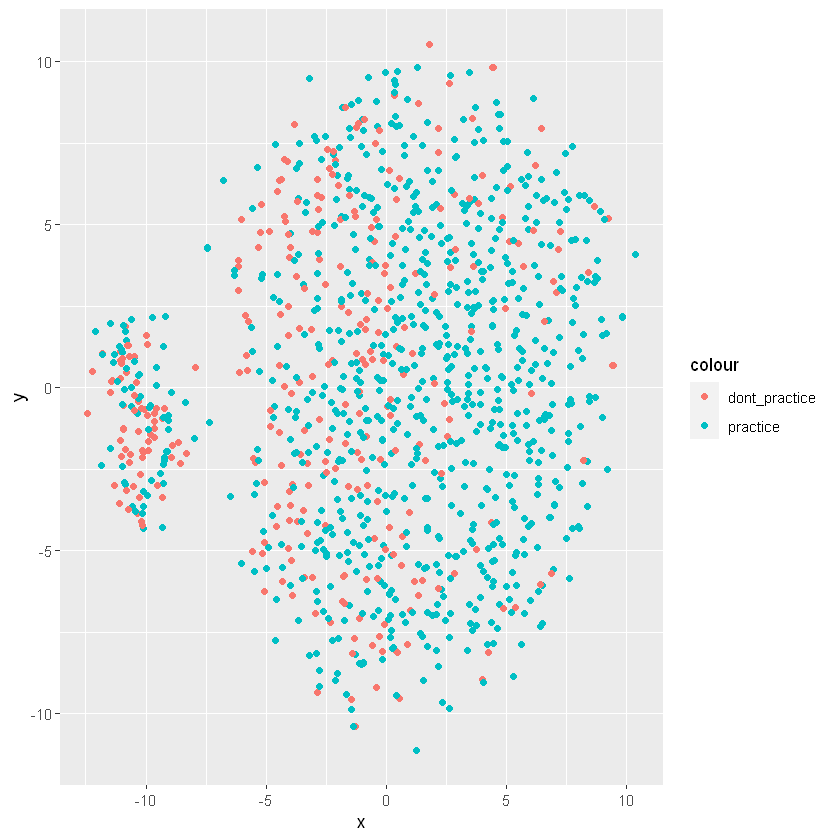

In [297]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_during )
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

Clusters now are not well defined

### Strange don't practice

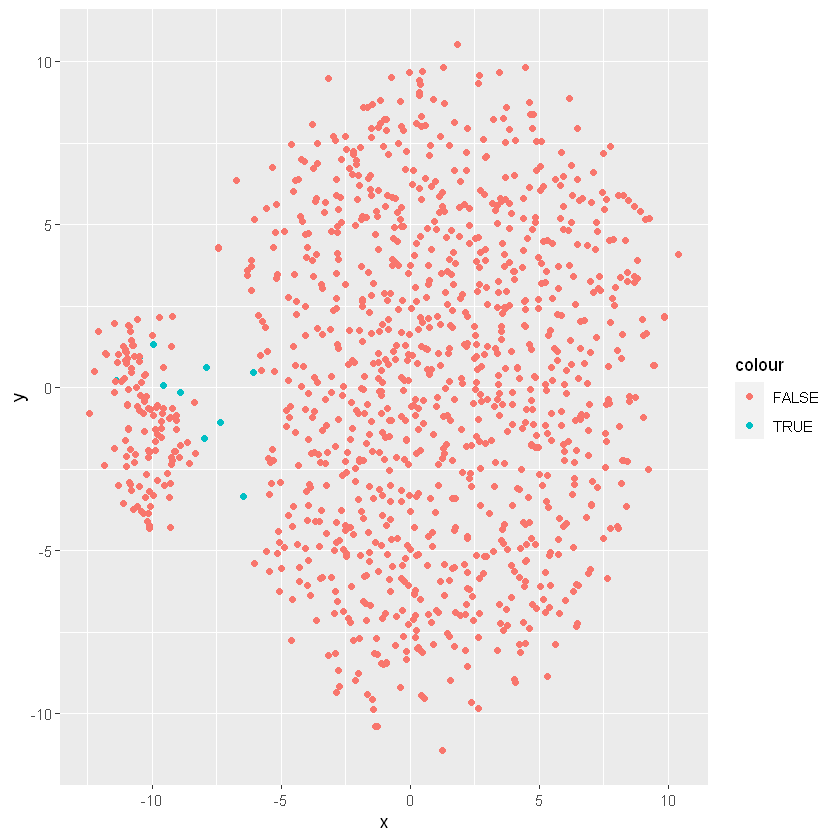

In [298]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_dp)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Strange practice

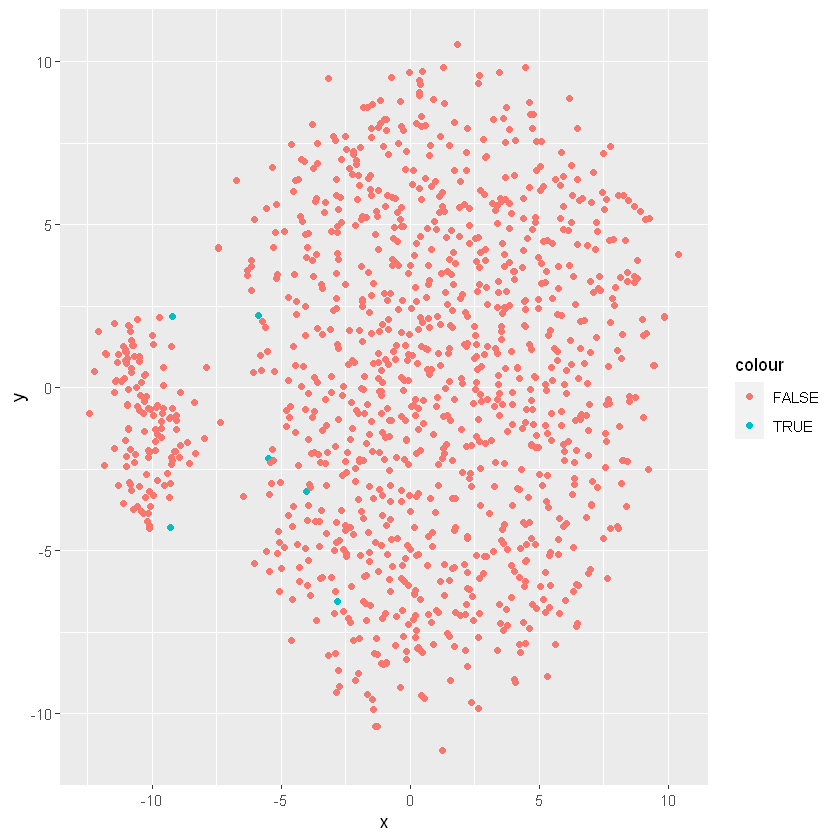

In [299]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_p)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Has tag or depression

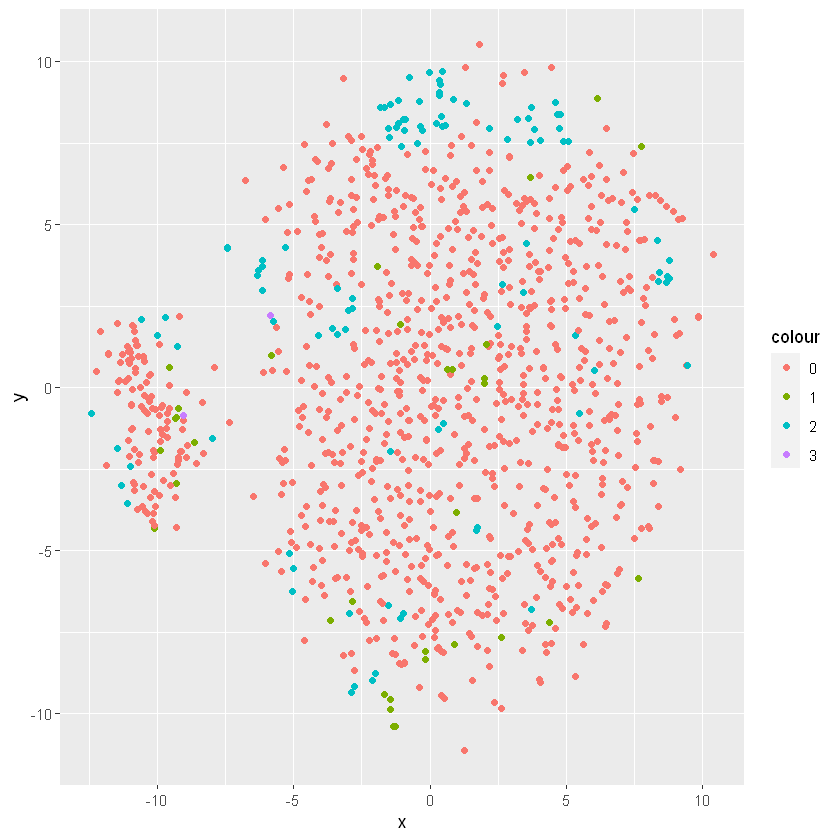

In [300]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$depression_anxiety)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

## Rejecting the outliers 

### Finding the distance between centroinds and outliers 

In [301]:
distances_sdp <- distance_to_centroids(main_tsne_df, strange_dp, "practice", "dont_practice")
distances_sdp
distances_sp <- distance_to_centroids(main_tsne_df, strange_p, "practice", "dont_practice")
distances_sp

id,d1,d2
<chr>,<dbl>,<dbl>
18,10.903040,1.151440
32,12.733988,1.663894
55,11.870024,1.845715
64,8.542975,4.421450
77,11.350225,2.227792
87,7.453873,4.294264
112,9.463549,2.291237
125,8.793654,2.803827
128,9.279600,2.713854


id,d1,d2
<chr>,<dbl>,<dbl>
96,7.514671,5.305998
245,10.749262,3.231983
270,7.879108,9.252380
369,7.225859,4.828075
429,6.310171,6.549476
1117,11.524174,3.485959


### Output: PA_during

#### Outlier: Strange Dont Practice

In [302]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_dp
outliers_result <- outliers_checker(distances_sdp, pa_dataset_copy, "PA_practice_during")

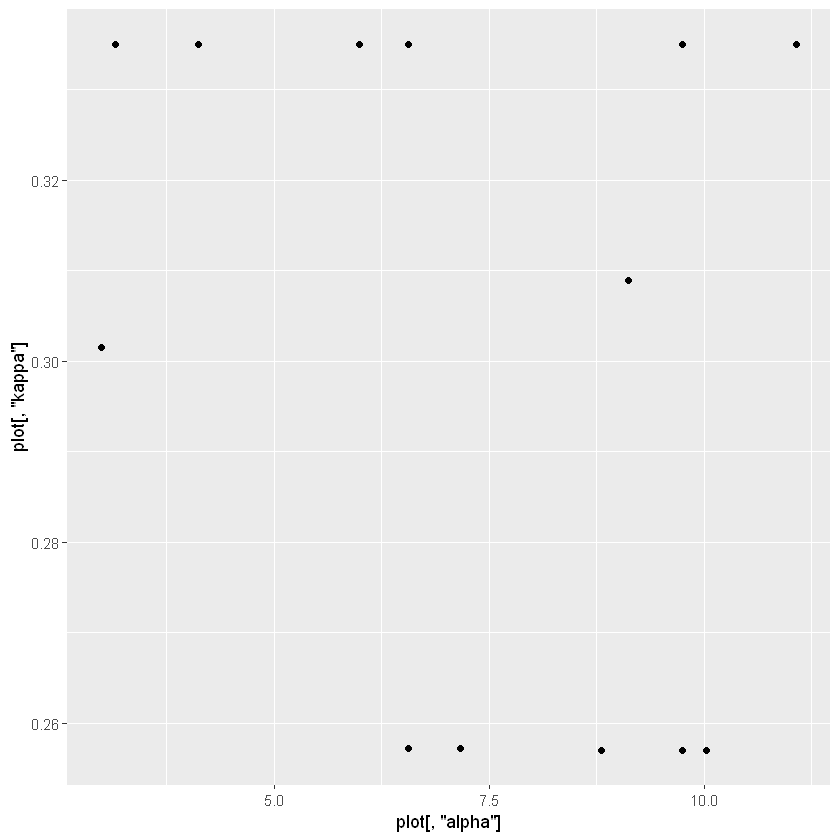

In [303]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

In [304]:
dim(pa_dataset)
dim(pa_dataset[outliers_result$best_model$remaining_data, ])
pa_dataset <- pa_dataset[outliers_result$best_model$remaining_data, ]

[1] 1242   74

[1] 1241   74

#### Outlier: Strange Practice

In [305]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_p[as.numeric(outliers_result$best_model$remaining_data)]
outliers_result <- outliers_checker(distances_sp, pa_dataset_copy, "PA_practice_during")

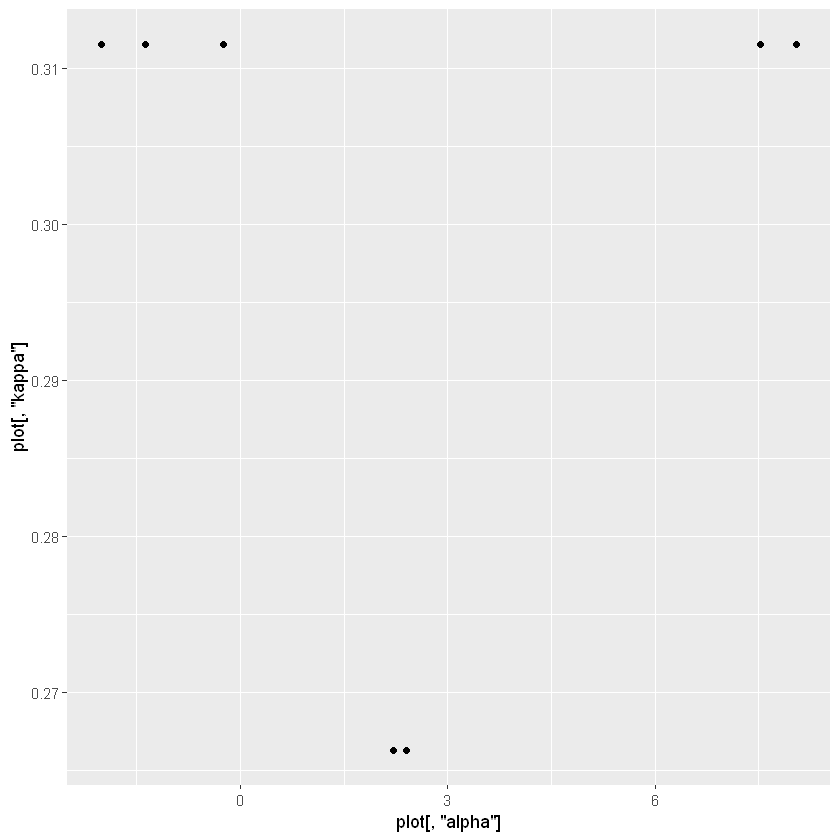

In [306]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

In [307]:
dim(pa_dataset)
dim(pa_dataset[outliers_result$best_model$remaining_data, ])
pa_dataset <- pa_dataset[outliers_result$best_model$remaining_data, ]

[1] 1241   74

[1] 1241   74

### Output Sedentary Time

#### Outlier: Strange Dont Practice

In [308]:
sedentery_dataset_copy <- sedentary_dataset
sedentery_dataset_copy["outlier"] <- strange_dp
outliers_result <- outliers_checker(distances_sdp, sedentery_dataset_copy, "sedentary_time_range_during")

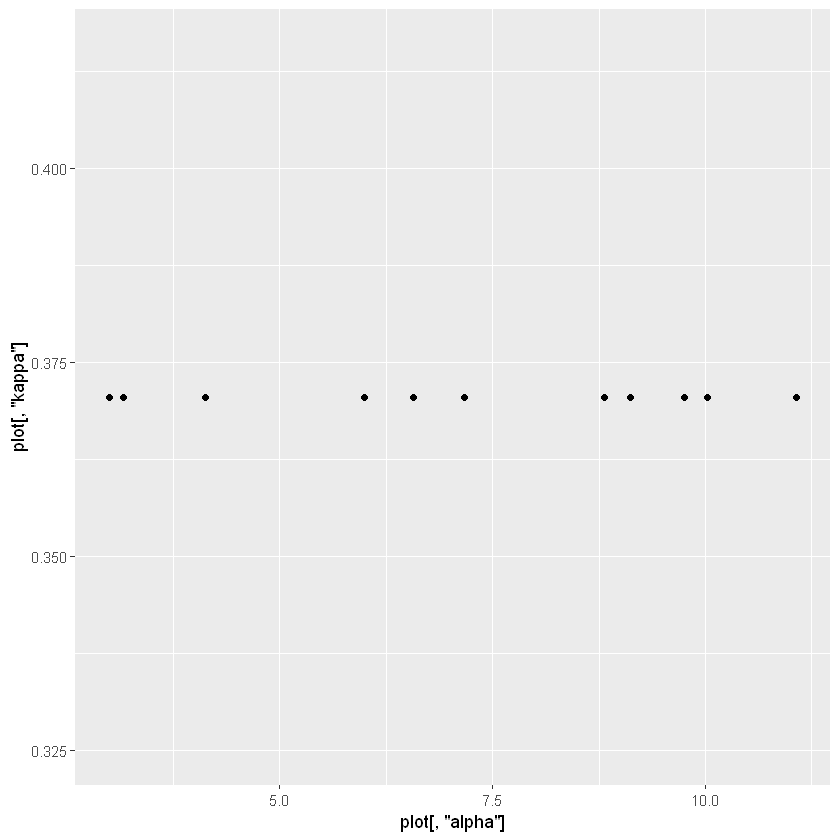

In [309]:
plot <- outliers_result$kappa_x_alpha

ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

In [310]:
dim(sedentary_dataset)
dim(sedentary_dataset[outliers_result$best_model$remaining_data, ])

[1] 1242   74

[1] 1242   74

#### Outlier: Strange Practice

In [311]:
sedentary_dataset_copy <- sedentary_dataset
sedentary_dataset_copy["outlier"] <- strange_p
outliers_result <- outliers_checker(distances_sp, sedentary_dataset_copy, "sedentary_time_range_during")

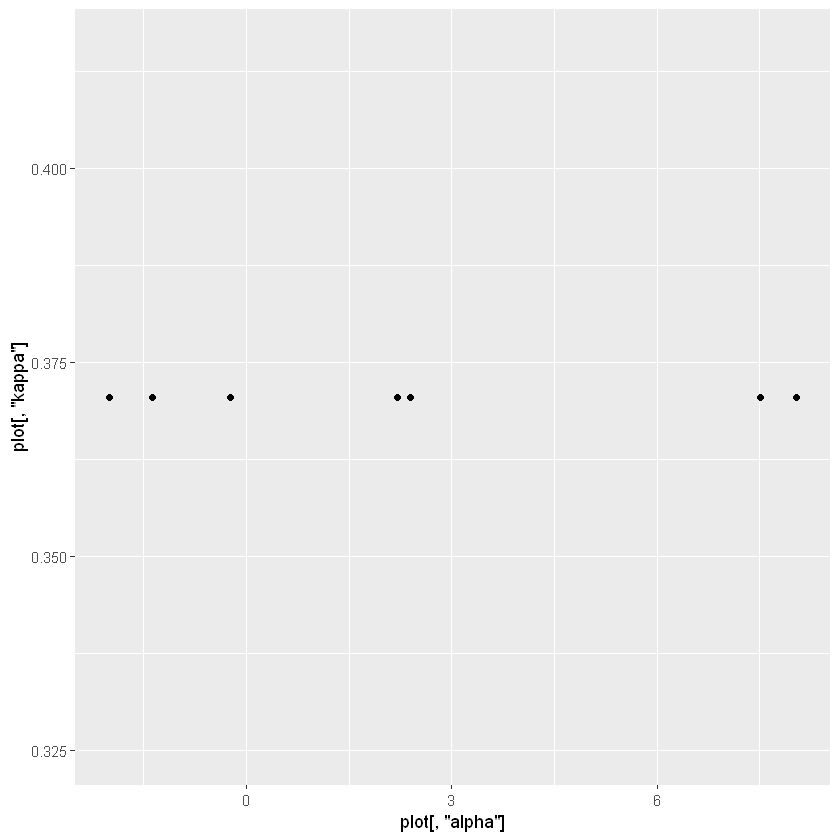

In [312]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

In [313]:
dim(sedentary_dataset)
dim(sedentary_dataset[outliers_result$best_model$remaining_data, ])
sedentary_dataset <- sedentary_dataset[outliers_result$best_model$remaining_data, ]

[1] 1242   74

[1] 1242   74

### Output: PA_behavior

#### Outlier: Strange Dont Practice

In [317]:
pa_behavior_dataset_copy <- pa_behavior_dataset
pa_behavior_dataset_copy["outlier"] <- strange_dp
outliers_result <- outliers_checker(distances_sdp, pa_behavior_dataset_copy, "pa_behavior")

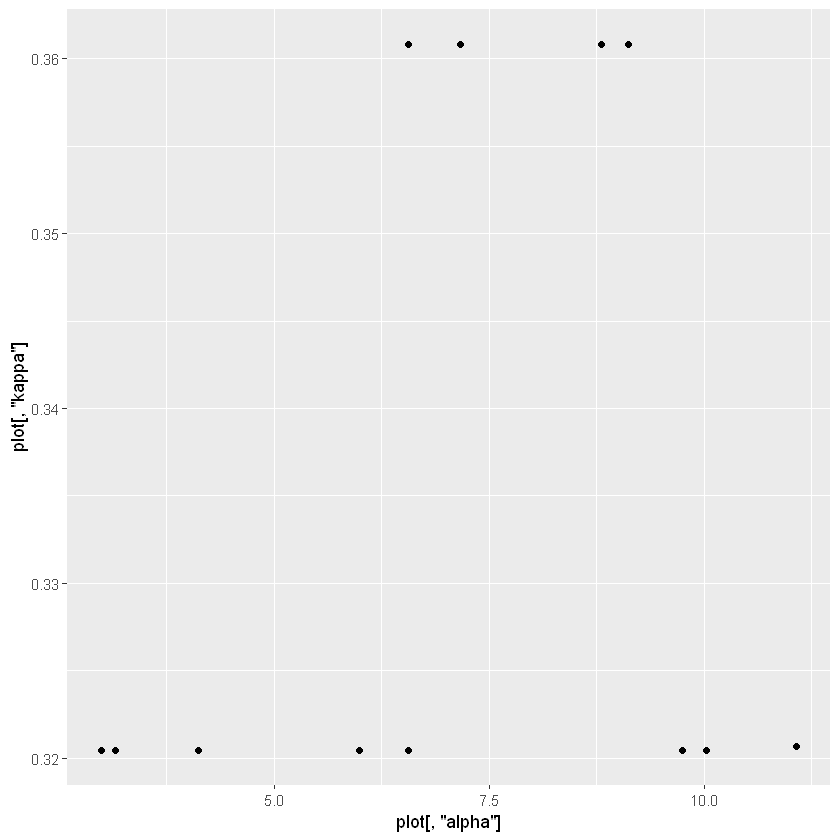

In [318]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

In [319]:
dim(pa_behavior_dataset)
dim(pa_behavior_dataset[outliers_result$best_model$remaining_data, ])
pa_behavior_dataset <- pa_behavior_dataset[outliers_result$best_model$remaining_data, ]

[1] 1242   73

[1] 1236   73

#### Outlier: Strange Practice

In [320]:
pa_behavior_dataset_copy <- pa_behavior_dataset
pa_behavior_dataset_copy["outlier"] <- strange_p[as.numeric(outliers_result$best_model$remaining_data)]
outliers_result <- outliers_checker(distances_sp, pa_behavior_dataset_copy, "pa_behavior")

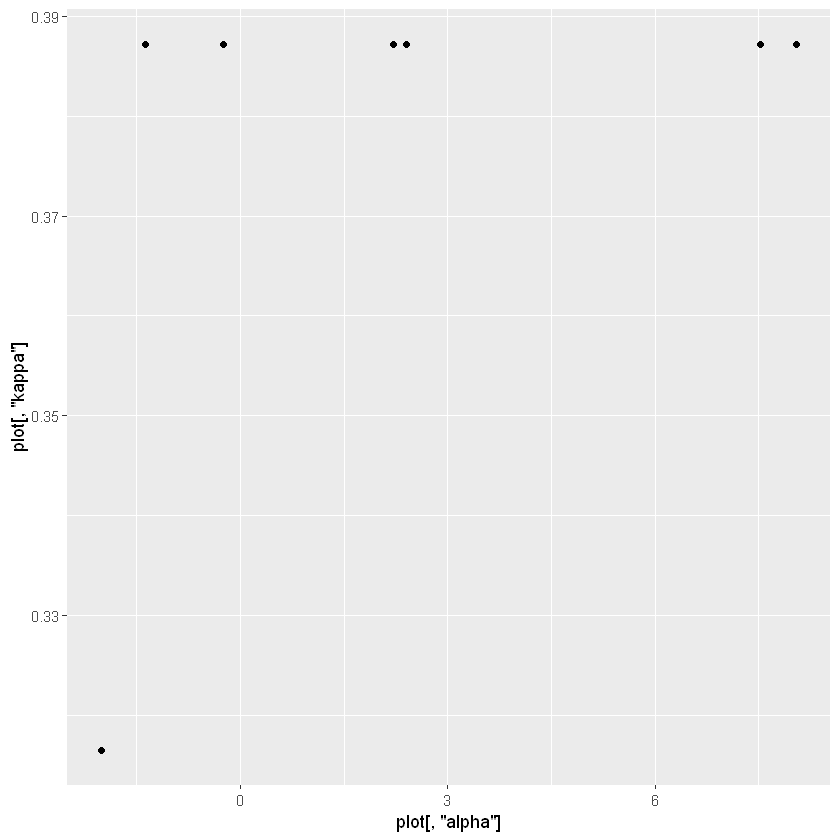

In [321]:
plot <- outliers_result$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

In [322]:
dim(pa_behavior_dataset)
dim(pa_behavior_dataset[outliers_result$best_model$remaining_data, ])
pa_behavior_dataset <- pa_behavior_dataset[outliers_result$best_model$remaining_data, ]

[1] 1236   73

[1] 1235   73